# Example 4.3: Two-layer feedforward network on Boston Housing Data

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn import preprocessing

import numpy as np
import pylab as plt

import os
if not os.path.isdir('figures'):
    os.makedirs('figures')

## Set the parameters of the network and for learning 

In [2]:
no_features = 13
no_hidden = 10
no_labels = 1

no_epochs = 200
batch_size = 32

seed = 10
tf.random.set_seed(seed)

## Read and preprocess data

In [3]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

print(x_train.shape)
print(y_test.shape)

(404, 13)
(102,)


In [4]:
# Define the FFN model and learning

In [5]:
model = Sequential([
    Dense(no_hidden, activation='relu'),
    Dense(no_labels, activation='linear')
])

In [6]:
model.compile(optimizer='sgd',
              loss='mse')

## Train the network

In [7]:
history = model.fit(x_train, y_train, 
                    epochs=no_epochs, 
                    batch_size=batch_size, 
                    verbose = 2, 
                    use_multiprocessing=True,
                    validation_data=(x_test, y_test))

Epoch 1/200
13/13 - 1s - loss: 185.6088 - val_loss: 33.1098
Epoch 2/200
13/13 - 0s - loss: 28.1344 - val_loss: 31.2765
Epoch 3/200
13/13 - 0s - loss: 22.0509 - val_loss: 21.7398
Epoch 4/200
13/13 - 0s - loss: 18.9617 - val_loss: 37.6456
Epoch 5/200
13/13 - 0s - loss: 17.9841 - val_loss: 27.5980
Epoch 6/200
13/13 - 0s - loss: 16.4545 - val_loss: 18.4530
Epoch 7/200
13/13 - 0s - loss: 12.9804 - val_loss: 18.6710
Epoch 8/200
13/13 - 0s - loss: 13.6558 - val_loss: 17.2603
Epoch 9/200
13/13 - 0s - loss: 11.4942 - val_loss: 19.6645
Epoch 10/200
13/13 - 0s - loss: 10.8101 - val_loss: 20.9645
Epoch 11/200
13/13 - 0s - loss: 11.3740 - val_loss: 19.0597
Epoch 12/200
13/13 - 0s - loss: 12.5716 - val_loss: 21.3986
Epoch 13/200
13/13 - 0s - loss: 13.9235 - val_loss: 20.4775
Epoch 14/200
13/13 - 0s - loss: 10.5751 - val_loss: 17.9288
Epoch 15/200
13/13 - 0s - loss: 10.1839 - val_loss: 19.1390
Epoch 16/200
13/13 - 0s - loss: 9.9733 - val_loss: 19.7835
Epoch 17/200
13/13 - 0s - loss: 9.9263 - val_loss

13/13 - 0s - loss: 7.3888 - val_loss: 18.2437
Epoch 140/200
13/13 - 0s - loss: 7.2099 - val_loss: 19.2993
Epoch 141/200
13/13 - 0s - loss: 7.6009 - val_loss: 18.1989
Epoch 142/200
13/13 - 0s - loss: 7.8714 - val_loss: 18.4866
Epoch 143/200
13/13 - 0s - loss: 7.1126 - val_loss: 17.4971
Epoch 144/200
13/13 - 0s - loss: 6.7089 - val_loss: 18.1046
Epoch 145/200
13/13 - 0s - loss: 6.9885 - val_loss: 20.0938
Epoch 146/200
13/13 - 0s - loss: 6.9543 - val_loss: 19.1449
Epoch 147/200
13/13 - 0s - loss: 7.5994 - val_loss: 18.4592
Epoch 148/200
13/13 - 0s - loss: 6.9322 - val_loss: 17.5039
Epoch 149/200
13/13 - 0s - loss: 6.6950 - val_loss: 19.9976
Epoch 150/200
13/13 - 0s - loss: 7.2799 - val_loss: 18.6621
Epoch 151/200
13/13 - 0s - loss: 7.2113 - val_loss: 18.4939
Epoch 152/200
13/13 - 0s - loss: 6.6760 - val_loss: 18.9747
Epoch 153/200
13/13 - 0s - loss: 7.3113 - val_loss: 19.2181
Epoch 154/200
13/13 - 0s - loss: 6.9258 - val_loss: 17.8962
Epoch 155/200
13/13 - 0s - loss: 7.1164 - val_loss: 15

## Print final errors

In [8]:
print('train m.s.e. = %3.3f, test m.s.e. = %3.3f'%(history.history['loss'][-1], history.history['val_loss'][-1]))

train m.s.e. = 7.095, test m.s.e. = 18.562


## Plot learning curves

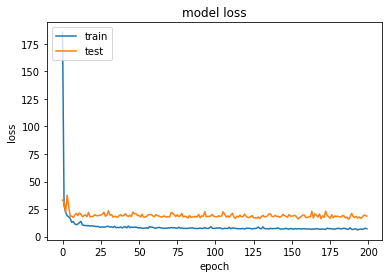

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('figures/4.3a_1.png')